## Open3D

In [1]:
import numpy as np
import open3d as o3d
%matplotlib inline
from copy import deepcopy

In [2]:
# pc = np.load('/home/ruslan/Documents/CTU/cam_pts_camera_0.npz')
pc = np.load('../pts/cam_pts_camera_0_1607456676.1540315.npz')
tmp = pc['pts'].transpose()

pts = deepcopy(tmp)
angle = np.pi
Rx = np.array([[1,0,0], [0, np.cos(angle), -np.sin(angle)], [0, np.sin(angle), np.cos(angle)]])
Ry = np.array([[np.cos(angle), 0, np.sin(angle)], [0, 1, 0], [-np.sin(angle),0, np.cos(angle)]])
Rz = np.array([[np.cos(angle), -np.sin(angle), 0], [ np.sin(angle), np.cos(angle), 0], [0,0,1]])

pts = Ry @ Rz @ pts.T
pts = pts.T

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pts)

o3d.visualization.draw_geometries([pcd])

In [3]:
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))

In [12]:
print("Define parameters used for hidden_point_removal")
# camera = [0, 0, diameter]
camera = [0, 0, 0]
radius = diameter * 10

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)
print(f"Selecting {len(pt_map)} visible points")

print("Visualize result")
pcd_res = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd_res])

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Selecting 664 visible points
Visualize result


### Example

In [14]:
import sys
sys.path.append('../../../../thirdparty/Open3D/examples/python/')
import open3d_tutorial as o3dtut

Convert mesh to a point cloud and estimate dimensions


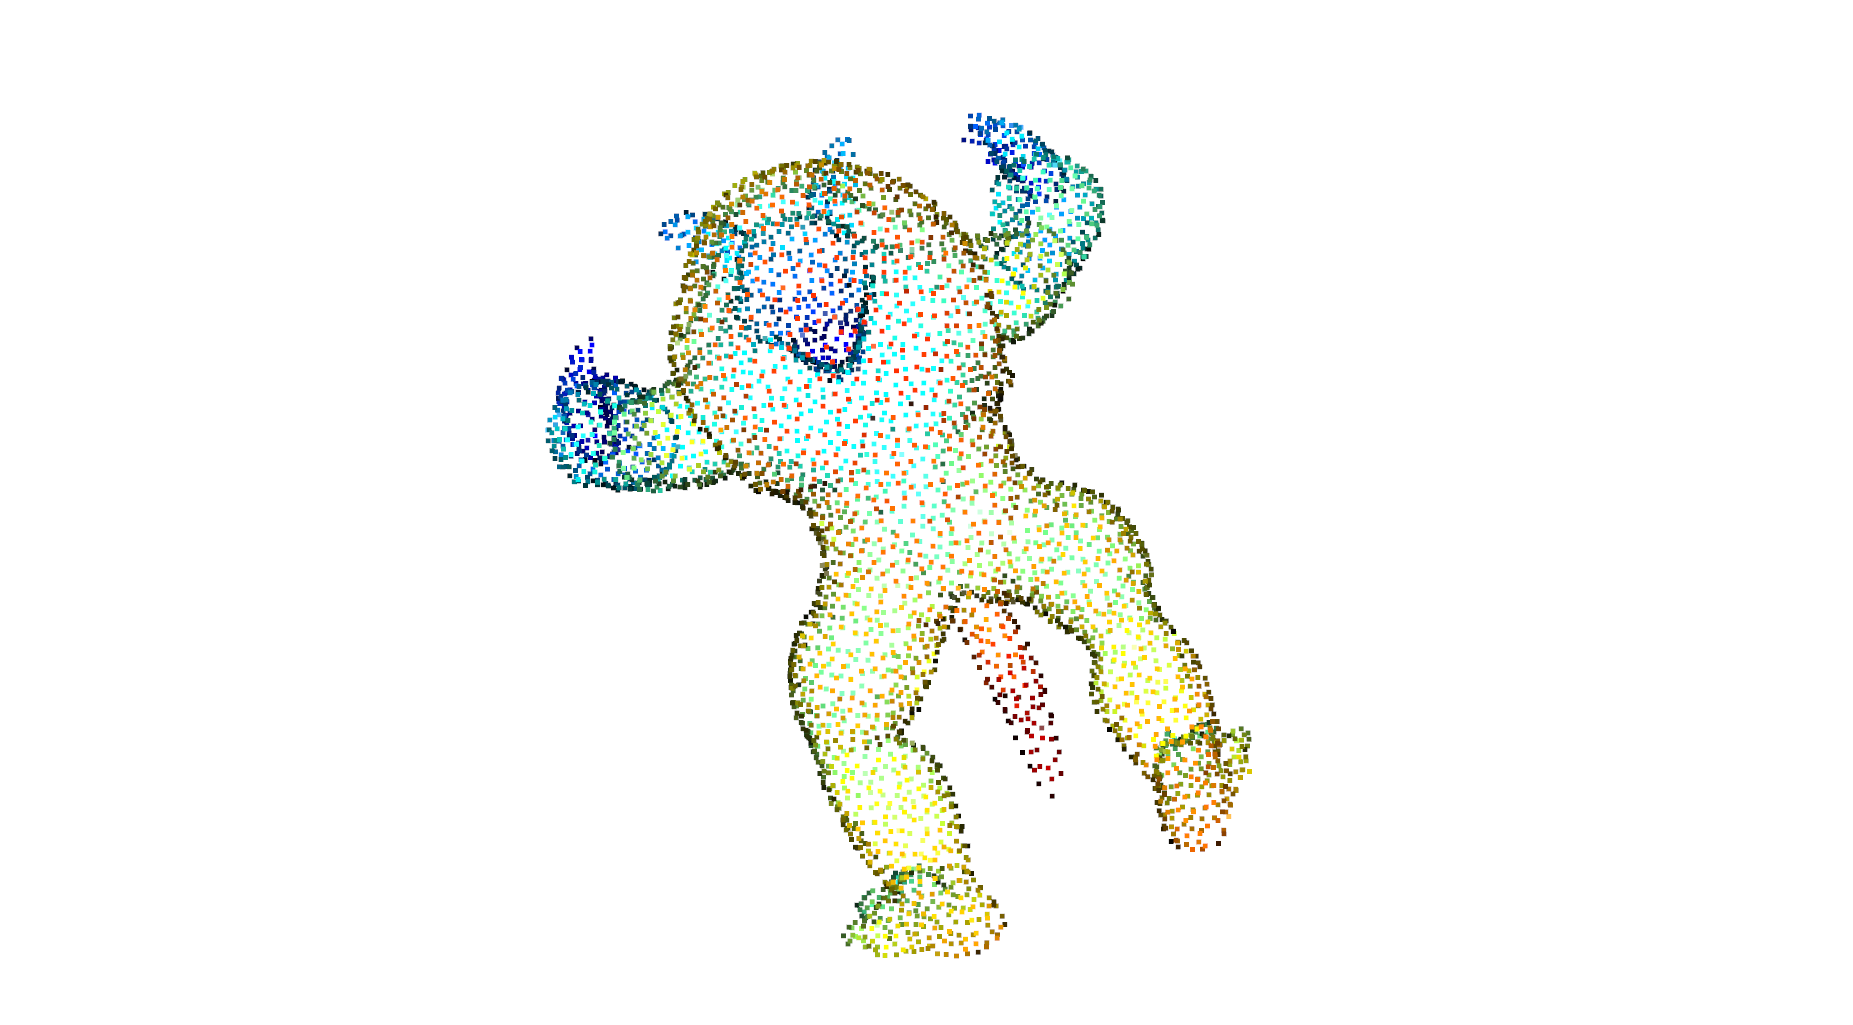

In [15]:
print("Convert mesh to a point cloud and estimate dimensions")
pcd = o3dtut.get_armadillo_mesh().sample_points_poisson_disk(5000)
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result


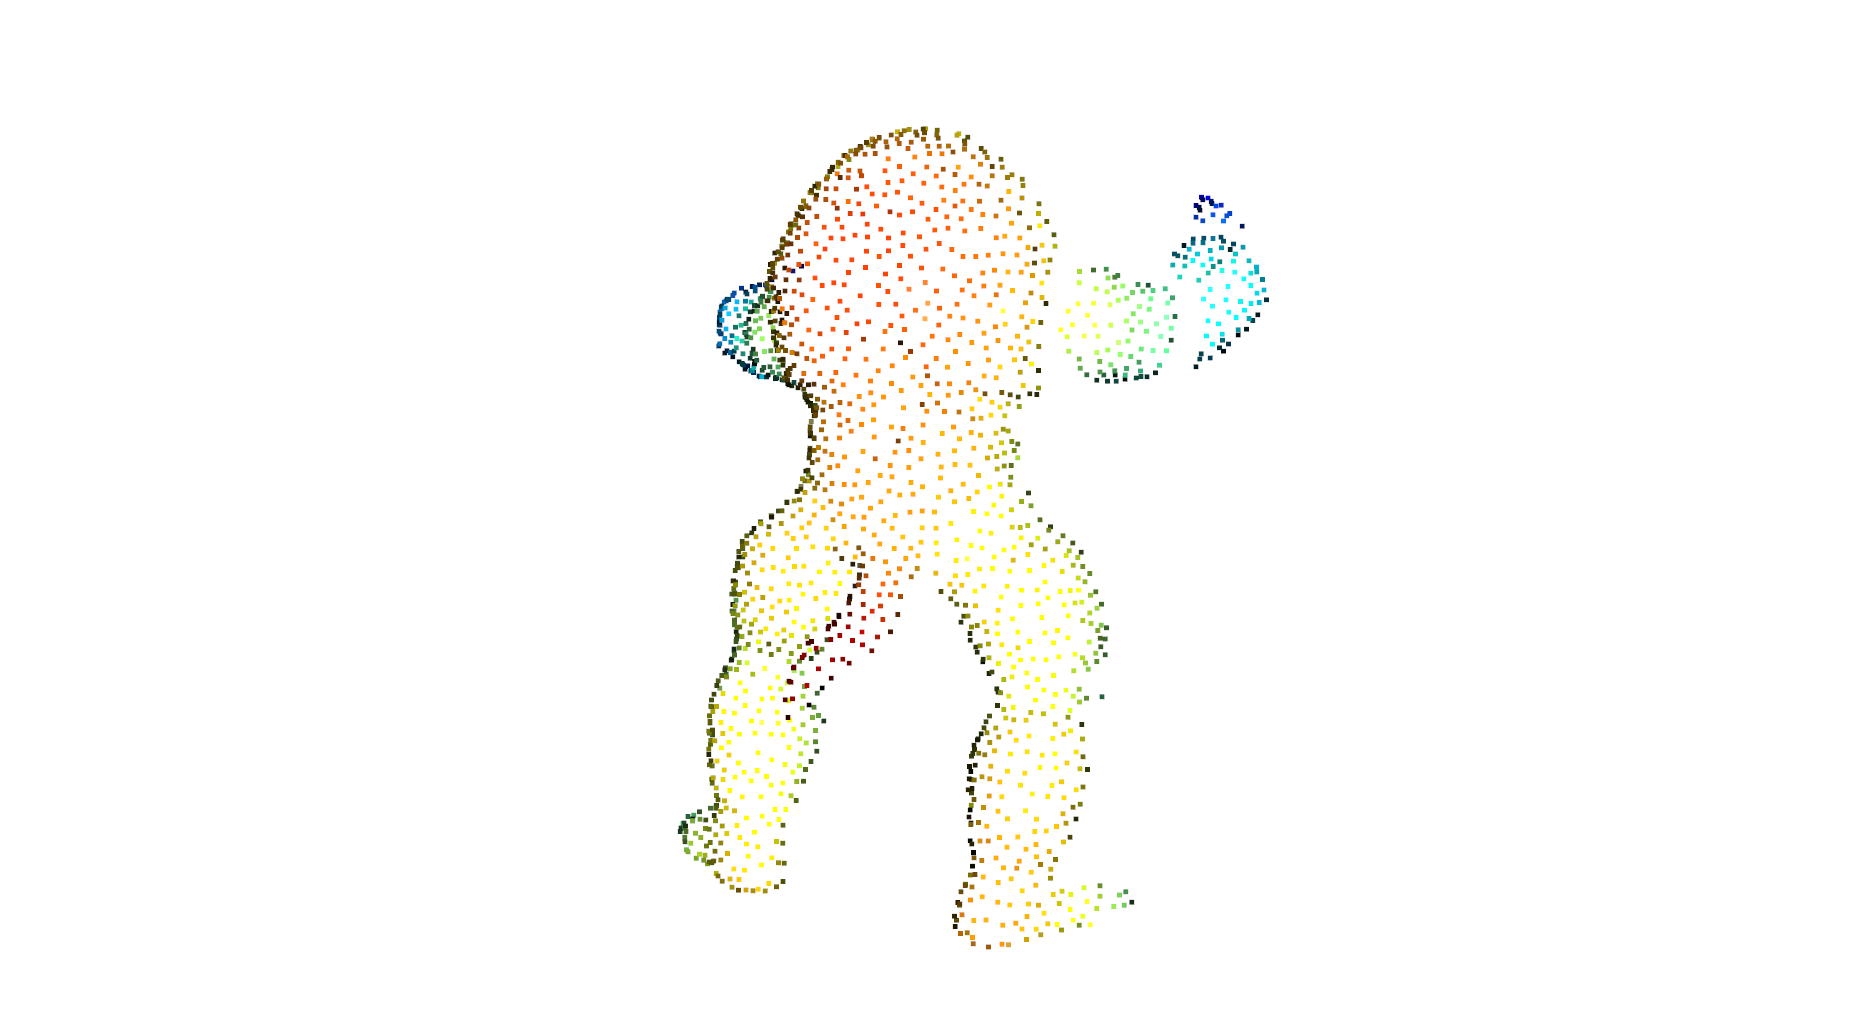

In [16]:
print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd_res = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd_res])